<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

### Summary of the EDA:
1. Target data is imbalanced -- number of loan defaulters is much less than those who pay off the loan.<br>
2. Most of the loans are less than 15,000.<br>
3. The grades and sub-grades are indicators of loan payers and defaulters. The higher the grade, the more reliable the borrower. Those with a grade of A pay off their loans most often, while those with a grade of G are the biggest defaulters.<br>


In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    """ function to retrieve column description"""
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [6]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

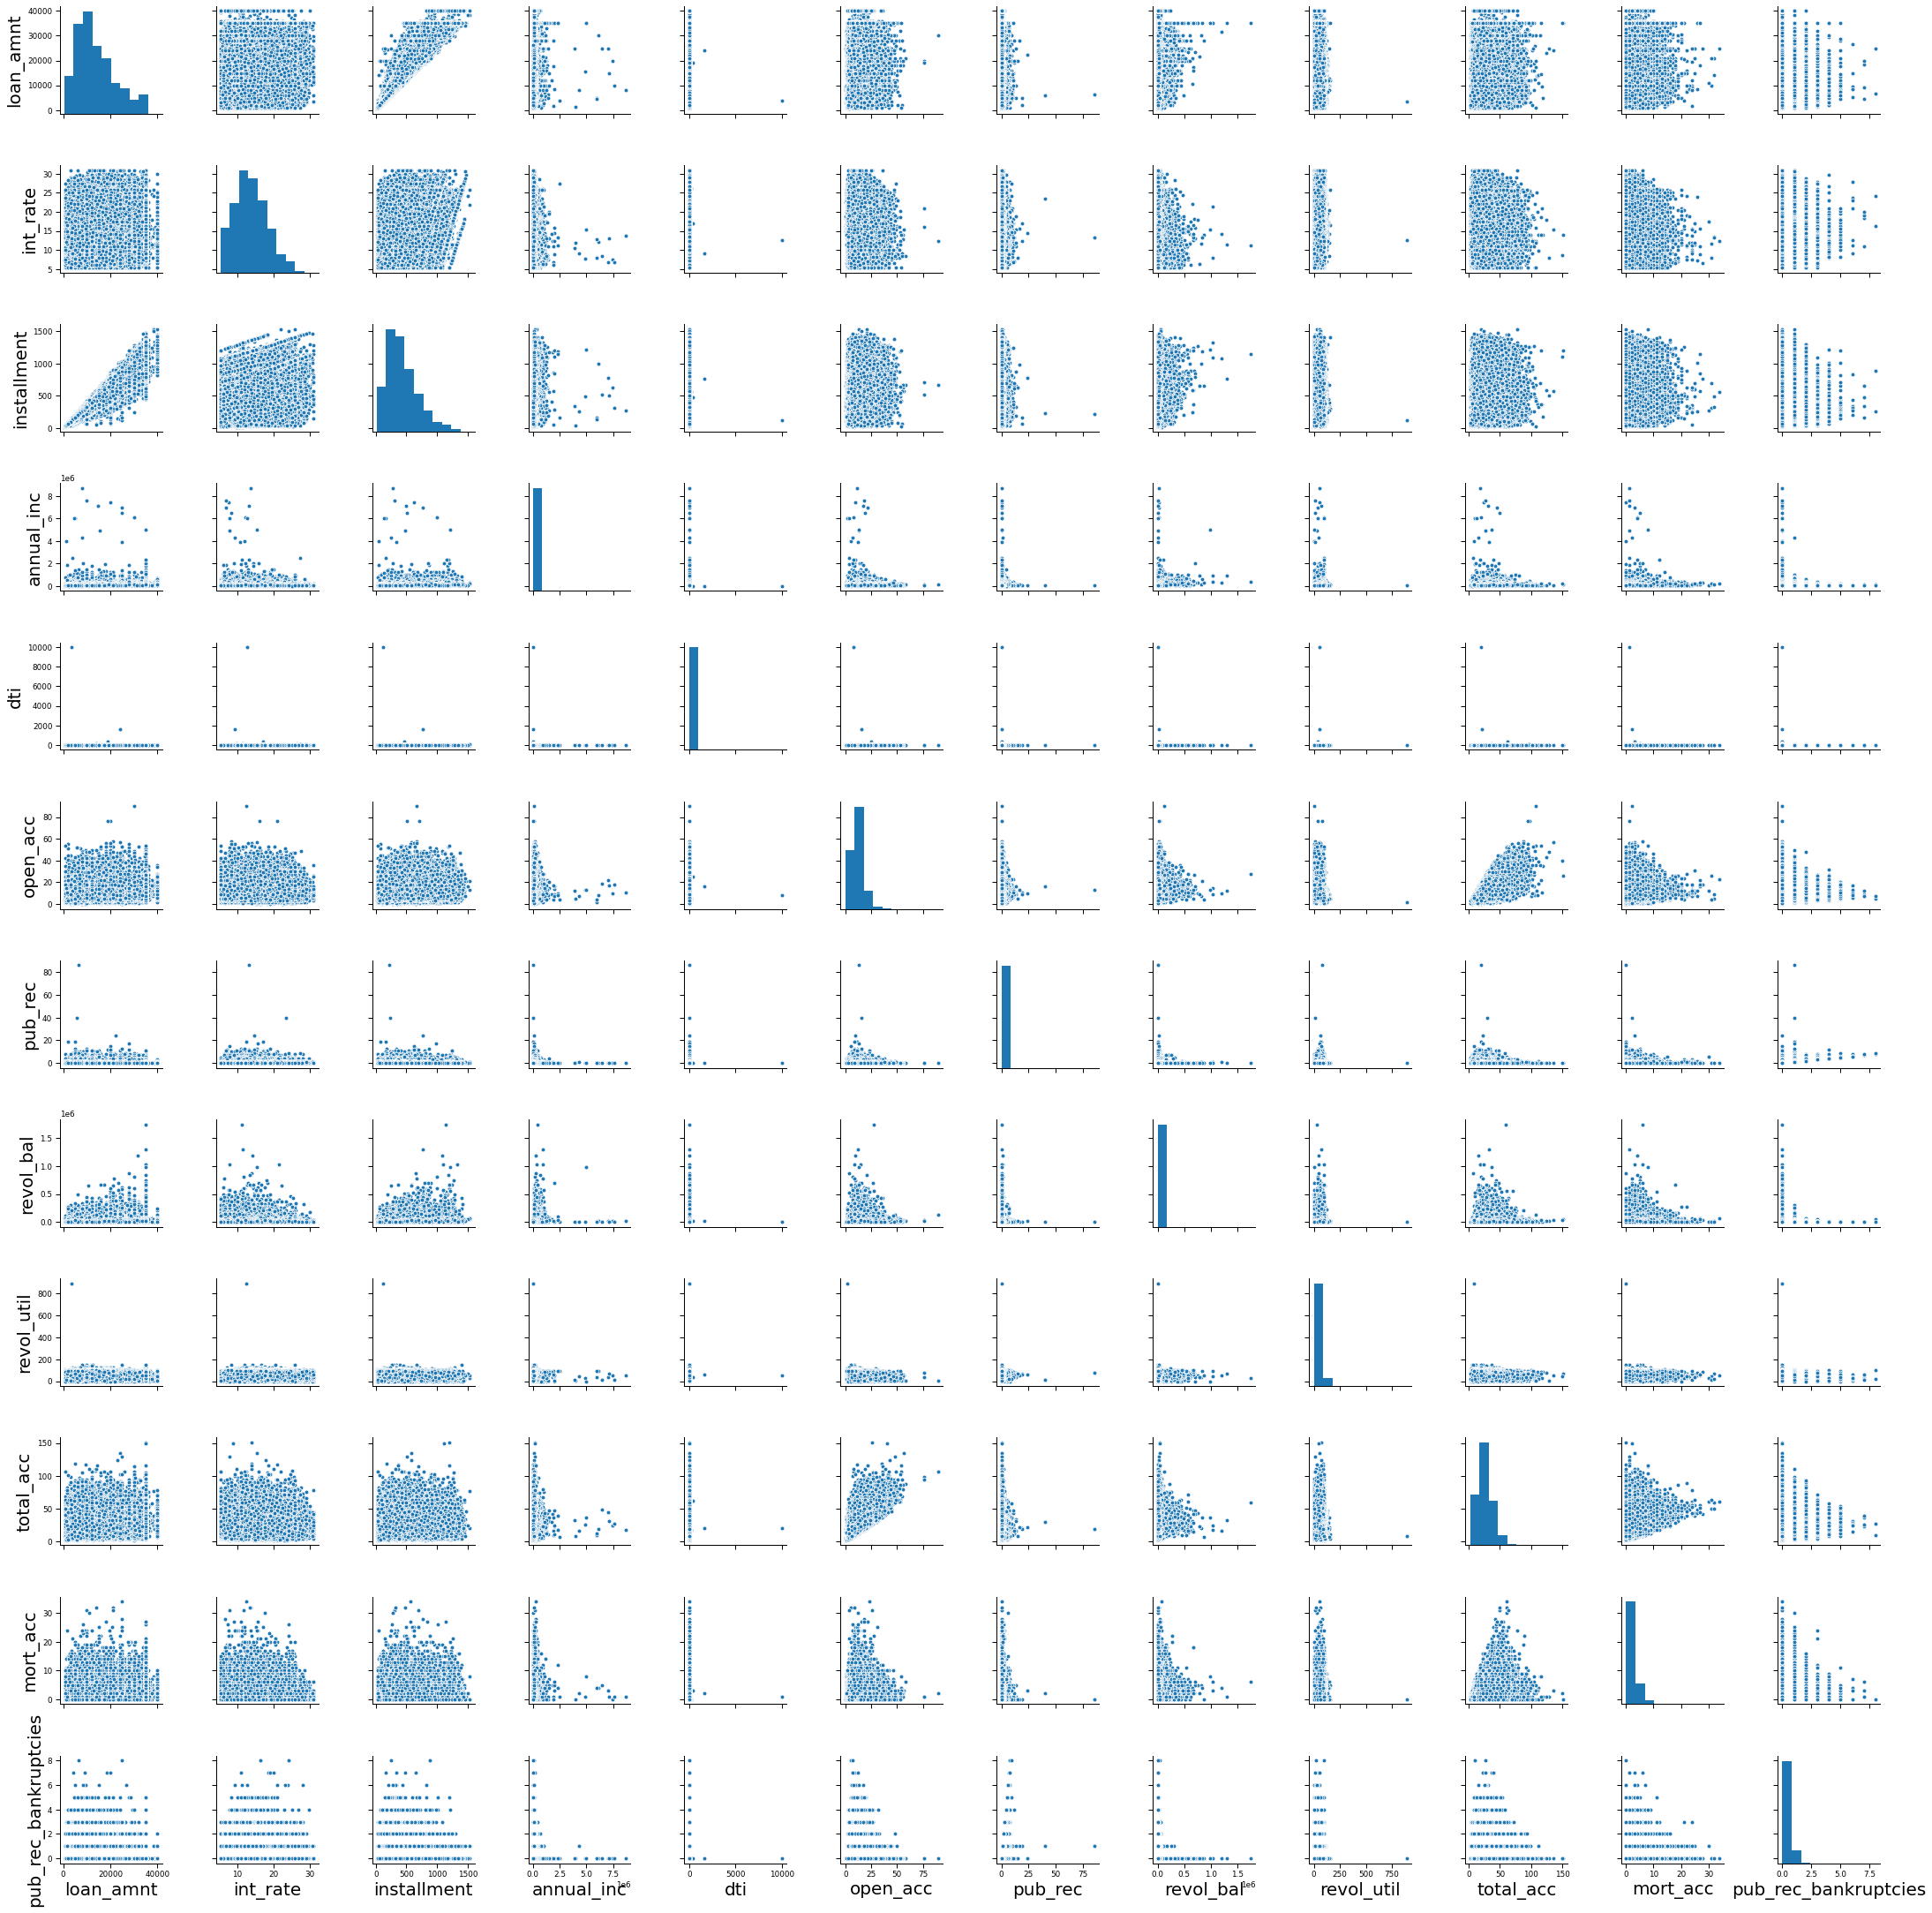

In [8]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(df)

**:Since we will be attempting to predict loan_status, create a countplot as shown below.**

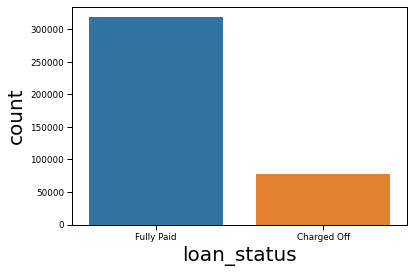

In [9]:
sns.countplot(x=df['loan_status']);

**:Create a histogram of the loan_amnt column.**

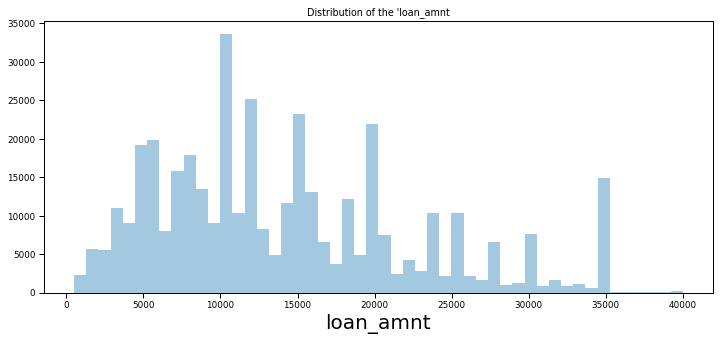

In [10]:

plt.figure(figsize=(12,5))
plt.title("Distribution of the 'loan_amnt")
sns.distplot(df['loan_amnt'],kde=False);

**Explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

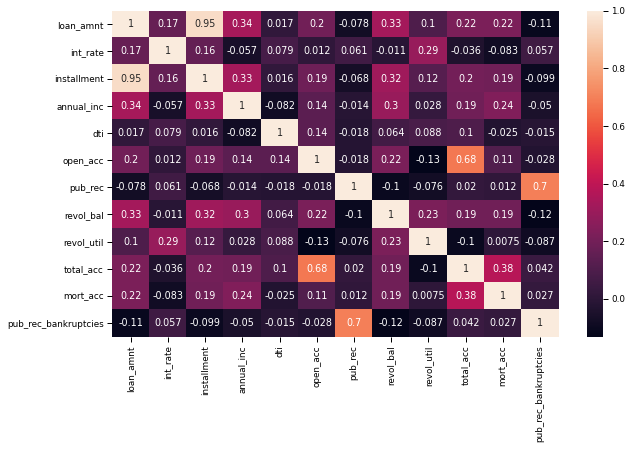

In [12]:
plt.figure(figsize = (10,6))
ax = sns.heatmap(df.corr(), annot=True)

**Almost perfect correlation of loan_amnt with the "installment" feature. Explore this further.**

In [13]:
feat_info('installment') # description of 'installment'

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt') # description of 'loan_amnt'

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


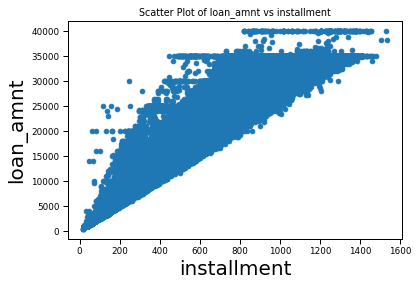

In [15]:
plt.scatter(df['installment'], df['loan_amnt'])
plt.xlabel('installment')
plt.ylabel('loan_amnt')
plt.title('Scatter Plot of loan_amnt vs installment');

**:Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [16]:
df[['loan_status', 'loan_amnt']]

,loan_status,loan_amnt
0,Fully Paid,10000.0
1,Fully Paid,8000.0
2,Fully Paid,15600.0
3,Fully Paid,7200.0
4,Charged Off,24375.0
...,...,...
396025,Fully Paid,10000.0
396026,Fully Paid,21000.0
396027,Fully Paid,5000.0
396028,Fully Paid,21000.0


In [17]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

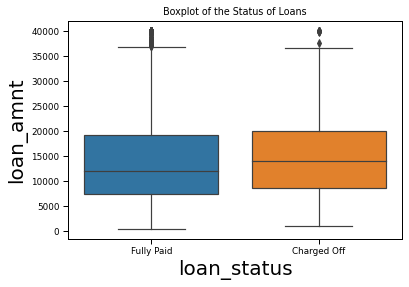

In [18]:
sns.boxplot(x= df['loan_status'], y=df['loan_amnt'])
plt.title("Boxplot of the Status of Loans");

**Summary statistics for the loan amount, grouped by the loan_status.**
Charged-off loans have a slightly higher average.

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploration of the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**:Create a countplot per grade. Set the hue to the loan_status label.**

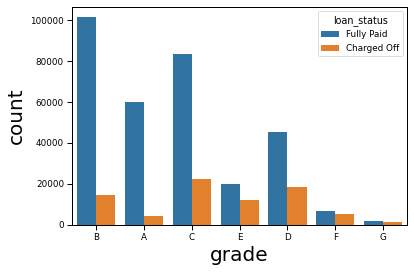

In [22]:
sns.countplot(x=df['grade'],hue=df['loan_status']);

**Explore loan_status per sub_grade.**

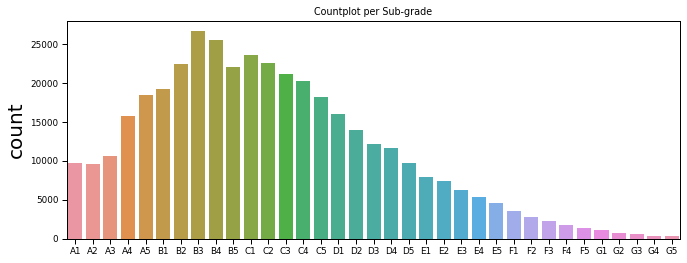

In [23]:
plt.figure(figsize=(11,4))
x1= sorted(df['sub_grade'])
sns.countplot(x=x1,data=df)
plt.title("Countplot per Sub-grade");

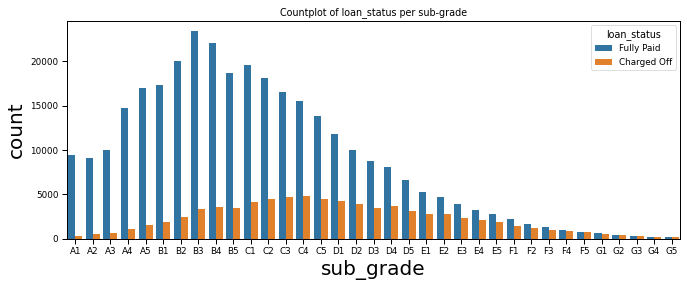

In [24]:
plt.figure(figsize=(11,4))
x1= sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, hue='loan_status', order=x1)
plt.title("Countplot of loan_status per sub-grade");

**:It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

Text(0.5, 1.0, 'Countplot of loan_status per sub-grade')

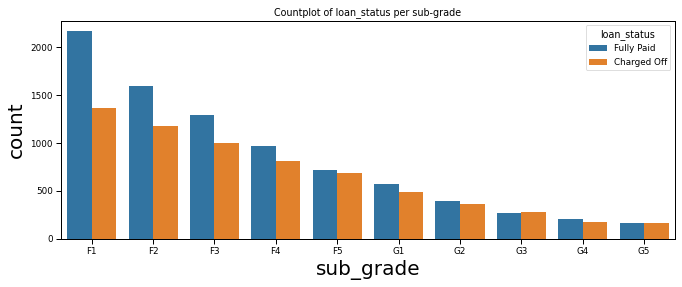

In [25]:
plt.figure(figsize=(11,4))
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')] # subset of data containing only F&G

sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g, order=sub_grade_order, hue=df['loan_status']);
plt.title("Countplot of loan_status per sub-grade")

**:Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [28]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

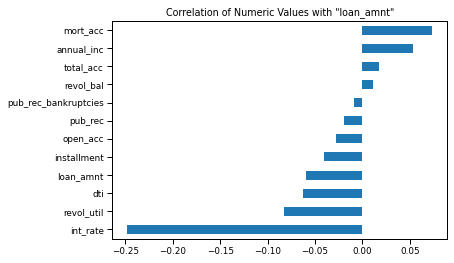

In [29]:
df.corr().loan_repaid.sort_values().drop('loan_repaid').plot(kind='barh')
plt.title('Correlation of Numeric Values with "loan_amnt"');

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



### Summary - Data PreProcessing:
- Categories with maximum missing values are, mort_acc(9.5%), emp_title(5.7%), and emp_length(4.6%).<br>
- emp_title dropped : over 173,000 unique titles.<br>
- Similar charged_off rates regardless of employment length. emp_length dropped.<br>
- 

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**:What is the length of the dataframe?**

In [30]:
len(df)

396030

**:Create a Series that displays the total count of missing values per column.**

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**:Convert this Series to be in term of percentage of the total DataFrame**

In [32]:
df.isnull().sum()/df.shape[0]*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**:Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [33]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [34]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**:How many unique employment job titles are there?**

In [35]:
df['emp_title'].nunique()

173105

In [36]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [37]:
df.drop('emp_title', axis=1, inplace=True)

**Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [38]:
df['emp_length'].nunique()

11

In [39]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

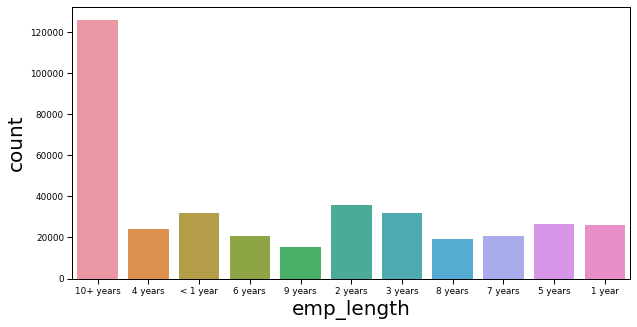

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df);

**: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

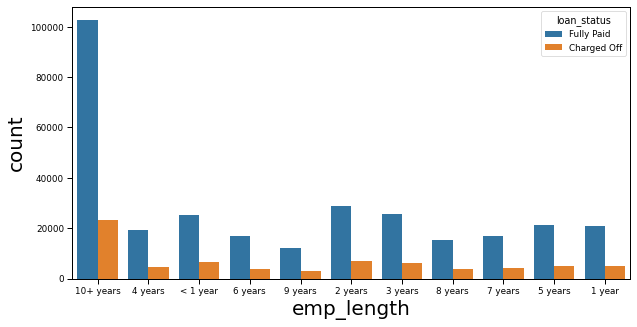

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df, hue='loan_status');

**CHALLENGE :This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [42]:
df_fullypaid_byemplength = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()
df_chargedoff_byemplength = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

In [43]:
print(df_fullypaid_byemplength)
print(df_chargedoff_byemplength)
frac_fullypaid = df_fullypaid_byemplength/ (df_fullypaid_byemplength+df_chargedoff_byemplength)
frac_chargedoff = df_chargedoff_byemplength/ (df_fullypaid_byemplength+df_chargedoff_byemplength)
#print (f'chargedoff:{frac_chargedoff}, fullypaid:{frac_fullypaid}')

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64
emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64


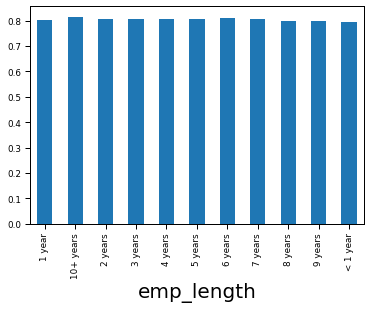

In [44]:
frac_fullypaid.plot(kind='bar')

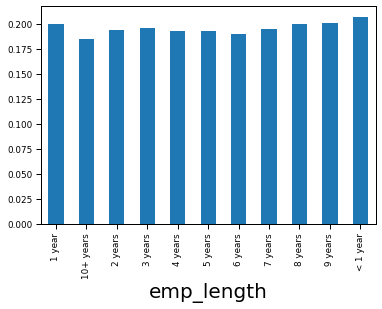

In [45]:
frac_chargedoff.plot(kind='bar')

**:Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [46]:
df.drop('emp_length', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**:Revisit the DataFrame to see what feature columns still have missing data.**

In [47]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**:Review the title column vs the purpose column. Is this repeated information?**

In [48]:
df[['title', 'purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [49]:
df[['title', 'purpose']].tail(10)

,title,purpose
396020,Debt consolidation,debt_consolidation
396021,2011 Insurance and Debt Consolidation,debt_consolidation
396022,Debt consolidation,debt_consolidation
396023,Debt consolidation,debt_consolidation
396024,Credit buster,debt_consolidation
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation
396029,Toxic Debt Payoff,debt_consolidation


**:The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [50]:
df.drop('title', axis=1, inplace=True)

**:Find out what the mort_acc feature represents**

In [51]:
feat_info('mort_acc')

Number of mortgage accounts.


**:Create a value_counts of the mort_acc column.**

In [52]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**Review the other columns to see which most highly correlates to mort_acc**

In [53]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**total_acc feature correlates best with the mort_acc <br>**

In [54]:
# mean of mort_acc grouped by total_acc:
mortacc_mean_bytotalacc = df.groupby('total_acc')['mort_acc'].mean()

#### Groupby total_acc and fill missing values of mort_acc with the mean

In [55]:
mort_acc_missing = lambda x: x.fillna(x.mean())

In [56]:
mort_acc_filled = df.groupby('total_acc')['mort_acc'].transform(mort_acc_missing)

**Fill in the missing mort_acc values based on the above formula**

In [57]:
df['mort_acc_filled'] = mort_acc_filled

In [58]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
mort_acc_filled             0
dtype: int64

In [59]:
df[['total_acc','mort_acc','mort_acc_filled']].head(100)

,total_acc,mort_acc,mort_acc_filled
0,25.0,0.0,0.000000
1,27.0,3.0,3.000000
2,26.0,0.0,0.000000
3,13.0,0.0,0.000000
4,43.0,1.0,1.000000
...,...,...,...
95,15.0,2.0,2.000000
96,31.0,1.0,1.000000
97,44.0,6.0,6.000000
98,22.0,NaN,1.640736


In [60]:
df.drop('mort_acc', axis=1, inplace=True)

**:revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Remove the rows that are missing those values in those columns with dropna().**

In [61]:
df.drop(['revol_util','pub_rec_bankruptcies'], axis=1, inplace=True)

## Categorical Variables and Dummy Variables


In [62]:
df.select_dtypes(include ='number').columns ### numeric columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'loan_repaid', 'mort_acc_filled'],
      dtype='object')

In [63]:
df.select_dtypes(exclude ='number').columns # non-numeric columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**:Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [64]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [65]:
df['term'] = df.term.map({' 36 months':36, ' 60 months':60})

### grade feature

**:We already know grade is part of sub_grade, so just drop the grade feature.**

In [66]:
df.drop('grade', axis=1, inplace=True)

**:Convert the subgrade into dummy variables.**

In [67]:
df = pd.get_dummies(df, columns=['sub_grade'], prefix=None, drop_first=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 55 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   home_ownership       396030 non-null  object 
 5   annual_inc           396030 non-null  float64
 6   verification_status  396030 non-null  object 
 7   issue_d              396030 non-null  object 
 8   loan_status          396030 non-null  object 
 9   purpose              396030 non-null  object 
 10  dti                  396030 non-null  float64
 11  earliest_cr_line     396030 non-null  object 
 12  open_acc             396030 non-null  float64
 13  pub_rec              396030 non-null  float64
 14  revol_bal            396030 non-null  float64
 15  total_acc        

### verification_status, application_type,initial_list_status,purpose 
**:Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [69]:
# CODE HERE

In [70]:
df = pd.get_dummies(df, columns=['verification_status', 'application_type',
                                 'initial_list_status','purpose'], prefix=None, drop_first=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 69 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   home_ownership                       396030 non-null  object 
 5   annual_inc                           396030 non-null  float64
 6   issue_d                              396030 non-null  object 
 7   loan_status                          396030 non-null  object 
 8   dti                                  396030 non-null  float64
 9   earliest_cr_line                     396030 non-null  object 
 10  open_acc                             396030 non-null  float64
 11  pub_rec      

### home_ownership
** :Review the value_counts for the home_ownership column.**

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Convert 'home_ownership' to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [73]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [74]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [75]:
df = pd.get_dummies(df, columns=['home_ownership'], prefix=None, drop_first=True)

### address
**Create a column called 'zip_code' that extracts the zip code from the address column.**

In [76]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [79]:
import time

begin=time.time()
df['temp'] = df['address'].str.split(',').apply(lambda x: x[-1])
df['zip_code'] = df['temp'].str.split(' ').apply(lambda x:x[-1])
df.drop(['temp', 'address'], axis=1, inplace=True)

print('time using lambda function: ', time.time() - begin)
print(' head ', df['zip_code'].head())

time using lambda function:  1.592740535736084
 head  0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   issue_d                              396030 non-null  object 
 6   loan_status                          396030 non-null  object 
 7   dti                                  396030 non-null  float64
 8   earliest_cr_line                     396030 non-null  object 
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_bal    

**Make this zip_code column into dummy variables**

In [81]:
df = pd.get_dummies(df, columns=['zip_code'], prefix=None, drop_first=True)

### issue_d 

**This feature will be dropped, since we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date.**

In [82]:
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line
**:This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [83]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [84]:
#convert 
df['earliest_cr_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year
df.drop('earliest_cr_line', axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   loan_status                          396030 non-null  object 
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  loan_repaid  

**Drop the load_status column that was created earlier, since its a duplicate of the loan_repaid column.**

In [86]:
df.drop('loan_status', axis=1, inplace=True)

### Save as ouput csv for running model

In [87]:
#df_s.to_csv(r'C:\Users\ssatt\Documents\Udemy\Refactored_Py_DS_ML_Bootcamp-master\Keras_proj_sample.csv', index = False)
df.to_csv(r'C:\Users\ssatt\Documents\Udemy\Refactored_Py_DS_ML_Bootcamp-master\Keras_proj_all.csv', index=False)